In [29]:
import pandas as pd

In [30]:
data = pd.read_csv("Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [31]:
#Since user id is not an impactful variable in the classification, so we will drop the column

data = data.drop("User ID", axis = 1)
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [32]:
#describing the data

data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [33]:
# check whether any value is null or not

data.isnull().sum()

,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [34]:
# performing one hot encoding to convert male and female data to integers, as the ml model understands numbers

data = pd.get_dummies(data)
data.head()

# adding a male and female seperate columns
data['male'] = data["Gender_Male"].apply(lambda x: 1 if x == True else 0)
data['female'] = data["Gender_Male"].apply(lambda x: 0 if x == True else 1)
data.drop("Gender_Male", axis = 1, inplace = True)
data.head()
#

,Age,EstimatedSalary,Purchased,Gender_Female,male,female
0,19,19000,0,False,1,0
1,35,20000,0,False,1,0
2,26,43000,0,True,0,1
3,27,57000,0,True,0,1
4,19,76000,0,False,1,0


In [35]:
#shifting the purchased value to the end of the dataframe

data = data[["Age", "EstimatedSalary", "male", "female", "Purchased"]]
data.head()

,Age,EstimatedSalary,male,female,Purchased
0,19,19000,1,0,0
1,35,20000,1,0,0
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,1,0,0


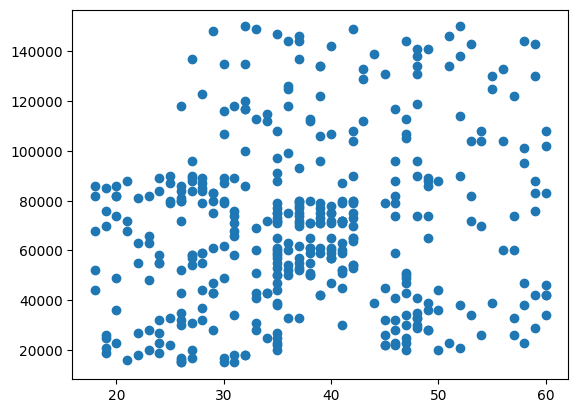

In [36]:
#visulizing the data
import matplotlib.pyplot as plt

plt.scatter(data["Age"], data["EstimatedSalary"])
plt.show()

In [42]:
#Scailing the data to make the classification more accurate

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[["Age", "EstimatedSalary"]] = scaler.fit_transform(data[["Age", "EstimatedSalary"]])
data.head()

,Age,EstimatedSalary,male,female,Purchased
0,-1.781797,-1.490046,1,0,0
1,-0.253587,-1.460681,1,0,0
2,-1.113206,-0.785290,0,1,0
3,-1.017692,-0.374182,0,1,0
4,-1.781797,0.183751,1,0,0


In [43]:
#splitting data into training and test data

from sklearn.model_selection import train_test_split

X = data.drop("Purchased", axis = 1)
y = data["Purchased"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [44]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 4), (80, 4), (320,), (80,))

In [45]:
#applying logistic regression

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [47]:
model.score(X_test, y_test)

0.8875

In [49]:
#computing confusion matrix

from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[50,  2],
       [ 7, 21]])